In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [2]:
cifar10_resnet_50_dictionary = np.load('CIFAR-10_ResNet_50_dictionary.npy', allow_pickle=True).item()
cifar10_vit_b_16_dictionary = np.load('CIFAR-10_ViT_B_16_dictionary.npy', allow_pickle=True).item()
cifar10_convnext_tiny_dictionary = np.load('CIFAR-10_ConvNeXt_Tiny_dictionary.npy', allow_pickle=True).item()

In [3]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_resnet_50_vi_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={23528522/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_resnet_50_vi_tuned_df.loc[len(cifar10_resnet_50_vi_tuned_df)] = row
    
min_indices = cifar10_resnet_50_vi_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_resnet_50_vi_retrained_df = cifar10_resnet_50_vi_tuned_df.loc[min_indices]
cifar10_resnet_50_vi_retrained_df['total_time'] = cifar10_resnet_50_vi_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [4]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ViT_B_16_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_vit_b_16_vi_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={23528522/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_vit_b_16_vi_tuned_df.loc[len(cifar10_vit_b_16_vi_tuned_df)] = row
    
min_indices = cifar10_vit_b_16_vi_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_vit_b_16_vi_retrained_df = cifar10_vit_b_16_vi_tuned_df.loc[min_indices]
cifar10_vit_b_16_vi_retrained_df['total_time'] = cifar10_vit_b_16_vi_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [5]:
experiments_directory = '/cluster/tufts/hugheslab/eharve06/data-emphasized-ELBo/experiments/retrained_CIFAR-10_ConvNeXt_Tiny_VI'
lr_0s = [0.1, 0.01, 0.001, 0.0001]
methods = ['l2-sp']
ns = [100, 1000, 10000, 50000]
random_states = [1001, 2001, 3001]

columns = ['method', 'model_name', 'n', 'random_state', 'runtime', 'train_loss', 'test_acc', 'test_nll']
cifar10_convnext_tiny_vi_tuned_df = pd.DataFrame(columns=columns)

for lr_0, method, n, random_state in itertools.product(lr_0s, methods, ns, random_states):
    model_name = f'{method}_kappa={23528522/n}_lr_0={lr_0}_n={n}_random_state={random_state}'
    temp_df = pd.read_csv(f'{experiments_directory}/{model_name}.csv')
    row = [method, model_name, n, random_state, temp_df['train_sec/epoch'].sum(), temp_df.train_loss.values[-1], temp_df.val_or_test_acc.values[-1], temp_df.val_or_test_nll.values[-1]]
    cifar10_convnext_tiny_vi_tuned_df.loc[len(cifar10_convnext_tiny_vi_tuned_df)] = row
    
min_indices = cifar10_convnext_tiny_vi_tuned_df.groupby(['method', 'n', 'random_state'])['train_loss'].idxmin()
cifar10_convnext_tiny_vi_retrained_df = cifar10_convnext_tiny_vi_tuned_df.loc[min_indices]
cifar10_convnext_tiny_vi_retrained_df['total_time'] = cifar10_convnext_tiny_vi_tuned_df.groupby(['method', 'n', 'random_state'])['runtime'].sum().values   

In [6]:
def plot_dictionary(ax, bootstrap_dictionary, n, random_states, markers=['o', '^', 's']):
    for index, random_state in enumerate(random_states):
        x = bootstrap_dictionary[n][random_state][:,:,:,0].mean(axis=(0,2,))
        y = bootstrap_dictionary[n][random_state][:,:,:,1].mean(axis=(0,2,))
        lower_x, upper_x = np.percentile(bootstrap_dictionary[n][random_state][:,:,:,0].mean(axis=(2,)), [2.5, 97.5], axis=(0,))
        lower_y, upper_y = np.percentile(bootstrap_dictionary[n][random_state][:,:,:,1].mean(axis=(2,)), [2.5, 97.5], axis=(0,))
        ax.scatter(x[-1]/3600, y[-1], color='#1F77B4', marker=markers[index], zorder=3)
        ax.plot(x/3600, y, color='#1F77B4', zorder=2)
        ax.fill_between(x/3600, lower_y, upper_y, alpha=0.1, color='#1F77B4', zorder=2)

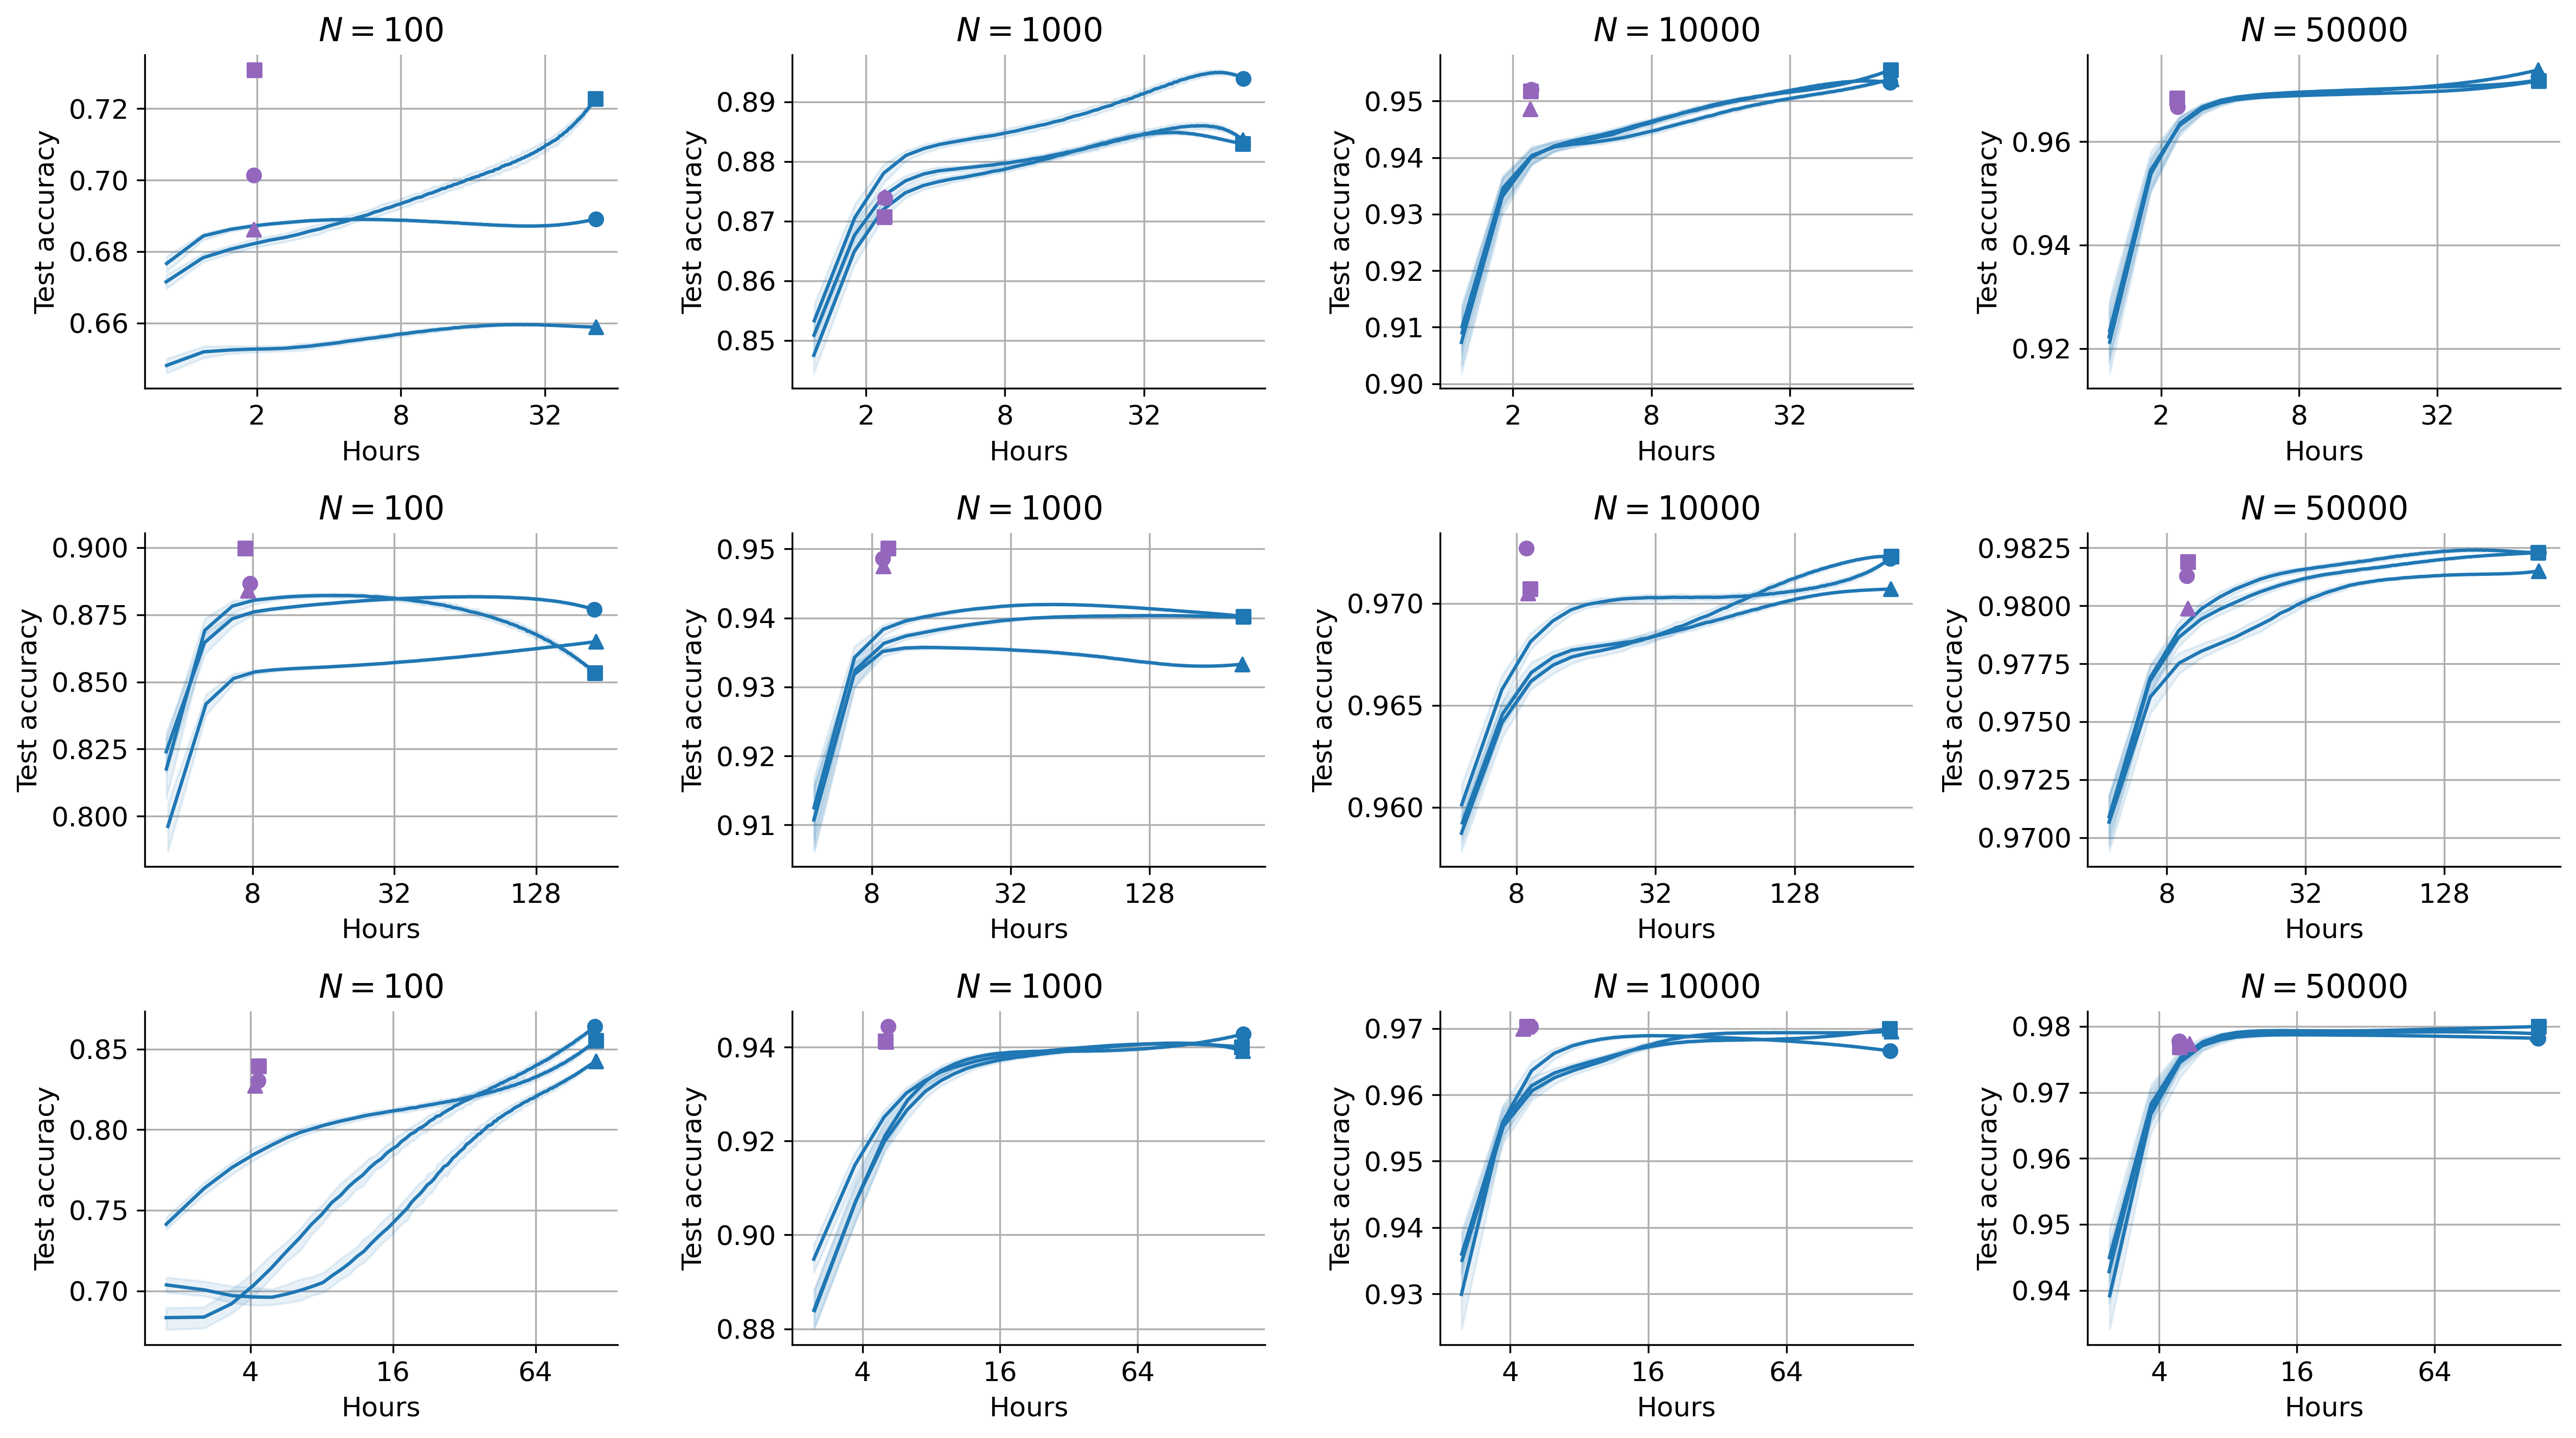

In [7]:
markers = ['o', '^', 's']

ncols, nrows = 4, 3
fig, axs = plt.subplots(dpi=300, figsize=(4*ncols, 3*nrows), ncols=ncols, nrows=nrows)

for index, (time, acc) in enumerate(zip(cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==100].total_time.values/3600, cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==100].test_acc.values)):
    axs[0,0].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[0,0], cifar10_resnet_50_dictionary, 100, [1001, 2001, 3001])
axs[0,0].set_xscale('log', base=2)
ticks = axs[0,0].get_xticks()
axs[0,0].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,0].spines[['right', 'top']].set_visible(False)
axs[0,0].set_title(r'$N=100$')
axs[0,0].set_xlabel('Hours')
axs[0,0].set_ylabel('Test accuracy')
axs[0,0].grid()

for index, (time, acc) in enumerate(zip(cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==1000].total_time.values/3600, cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==1000].test_acc.values)):
    axs[0,1].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[0,1], cifar10_resnet_50_dictionary, 1000, [1001, 2001, 3001])
axs[0,1].set_xscale('log', base=2)
ticks = axs[0,1].get_xticks()
axs[0,1].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,1].spines[['right', 'top']].set_visible(False)
axs[0,1].set_title(r'$N=1000$')
axs[0,1].set_xlabel('Hours')
axs[0,1].set_ylabel('Test accuracy')
axs[0,1].grid()

for index, (time, acc) in enumerate(zip(cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==10000].total_time.values/3600, cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==10000].test_acc.values)):
    axs[0,2].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[0,2], cifar10_resnet_50_dictionary, 10000, [1001, 2001, 3001])
axs[0,2].set_xscale('log', base=2)
ticks = axs[0,2].get_xticks()
axs[0,2].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,2].spines[['right', 'top']].set_visible(False)
axs[0,2].set_title(r'$N=10000$')
axs[0,2].set_xlabel('Hours')
axs[0,2].set_ylabel('Test accuracy')
axs[0,2].grid()

for index, (time, acc) in enumerate(zip(cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==50000].total_time.values/3600, cifar10_resnet_50_vi_retrained_df[cifar10_resnet_50_vi_retrained_df.n==50000].test_acc.values)):
    axs[0,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[0,3], cifar10_resnet_50_dictionary, 50000, [1001, 2001, 3001])
axs[0,3].set_xscale('log', base=2)
ticks = axs[0,3].get_xticks()
axs[0,3].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[0,3].spines[['right', 'top']].set_visible(False)
axs[0,3].set_title(r'$N=50000$')
axs[0,3].set_xlabel('Hours')
axs[0,3].set_ylabel('Test accuracy')
axs[0,3].grid()

for index, (time, acc) in enumerate(zip(cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==100].total_time.values/3600, cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==100].test_acc.values)):
    axs[1,0].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[1,0], cifar10_vit_b_16_dictionary, 100, [1001, 2001, 3001])
axs[1,0].set_xscale('log', base=2)
ticks = axs[1,0].get_xticks()
axs[1,0].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,0].spines[['right', 'top']].set_visible(False)
axs[1,0].set_title(r'$N=100$')
axs[1,0].set_xlabel('Hours')
axs[1,0].set_ylabel('Test accuracy')
axs[1,0].grid()

for index, (time, acc) in enumerate(zip(cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==1000].total_time.values/3600, cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==1000].test_acc.values)):
    axs[1,1].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[1,1], cifar10_vit_b_16_dictionary, 1000, [1001, 2001, 3001])
axs[1,1].set_xscale('log', base=2)
ticks = axs[1,1].get_xticks()
axs[1,1].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,1].spines[['right', 'top']].set_visible(False)
axs[1,1].set_title(r'$N=1000$')
axs[1,1].set_xlabel('Hours')
axs[1,1].set_ylabel('Test accuracy')
axs[1,1].grid()

for index, (time, acc) in enumerate(zip(cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==10000].total_time.values/3600, cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==10000].test_acc.values)):
    axs[1,2].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[1,2], cifar10_vit_b_16_dictionary, 10000, [1001, 2001, 3001])
axs[1,2].set_xscale('log', base=2)
ticks = axs[1,2].get_xticks()
axs[1,2].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,2].spines[['right', 'top']].set_visible(False)
axs[1,2].set_title(r'$N=10000$')
axs[1,2].set_xlabel('Hours')
axs[1,2].set_ylabel('Test accuracy')
axs[1,2].grid()

for index, (time, acc) in enumerate(zip(cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==50000].total_time.values/3600, cifar10_vit_b_16_vi_retrained_df[cifar10_vit_b_16_vi_retrained_df.n==50000].test_acc.values)):
    axs[1,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[1,3], cifar10_vit_b_16_dictionary, 50000, [1001, 2001, 3001])
axs[1,3].set_xscale('log', base=2)
ticks = axs[1,3].get_xticks()
axs[1,3].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[1,3].spines[['right', 'top']].set_visible(False)
axs[1,3].set_title(r'$N=50000$')
axs[1,3].set_xlabel('Hours')
axs[1,3].set_ylabel('Test accuracy')
axs[1,3].grid()

for index, (time, acc) in enumerate(zip(cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==100].total_time.values/3600, cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==100].test_acc.values)):
    axs[2,0].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[2,0], cifar10_convnext_tiny_dictionary, 100, [1001, 2001, 3001])
axs[2,0].set_xscale('log', base=2)
ticks = axs[2,0].get_xticks()
axs[2,0].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[2,0].spines[['right', 'top']].set_visible(False)
axs[2,0].set_title(r'$N=100$')
axs[2,0].set_xlabel('Hours')
axs[2,0].set_ylabel('Test accuracy')
axs[2,0].grid()

for index, (time, acc) in enumerate(zip(cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==1000].total_time.values/3600, cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==1000].test_acc.values)):
    axs[2,1].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[2,1], cifar10_convnext_tiny_dictionary, 1000, [1001, 2001, 3001])
axs[2,1].set_xscale('log', base=2)
ticks = axs[2,1].get_xticks()
axs[2,1].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[2,1].spines[['right', 'top']].set_visible(False)
axs[2,1].set_title(r'$N=1000$')
axs[2,1].set_xlabel('Hours')
axs[2,1].set_ylabel('Test accuracy')
axs[2,1].grid()

for index, (time, acc) in enumerate(zip(cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==10000].total_time.values/3600, cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==10000].test_acc.values)):
    axs[2,2].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[2,2], cifar10_convnext_tiny_dictionary, 10000, [1001, 2001, 3001])
axs[2,2].set_xscale('log', base=2)
ticks = axs[2,2].get_xticks()
axs[2,2].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[2,2].spines[['right', 'top']].set_visible(False)
axs[2,2].set_title(r'$N=10000$')
axs[2,2].set_xlabel('Hours')
axs[2,2].set_ylabel('Test accuracy')
axs[2,2].grid()

for index, (time, acc) in enumerate(zip(cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==50000].total_time.values/3600, cifar10_convnext_tiny_vi_retrained_df[cifar10_convnext_tiny_vi_retrained_df.n==50000].test_acc.values)):
    axs[2,3].scatter(time, acc, color='#9467BD', marker=markers[index], zorder=3)
plot_dictionary(axs[2,3], cifar10_convnext_tiny_dictionary, 50000, [1001, 2001, 3001])
axs[2,3].set_xscale('log', base=2)
ticks = axs[2,3].get_xticks()
axs[2,3].set_xticks([int(tick) for tick in ticks[2:-2]], [int(tick) for tick in ticks[2:-2]])
axs[2,3].spines[['right', 'top']].set_visible(False)
axs[2,3].set_title(r'$N=50000$')
axs[2,3].set_xlabel('Hours')
axs[2,3].set_ylabel('Test accuracy')
axs[2,3].grid()

fig.tight_layout()
fig.savefig('architectures_computational_time_comparison.pdf', bbox_inches='tight')
plt.show()